In [890]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
pd.set_option('future.no_silent_downcasting', True)

In [891]:
train_dataset = pd.read_csv('training_set.csv')

test_dataset = pd.read_csv('testing_set.csv')

In [892]:
train_dataset.shape

(614, 13)

In [893]:
test_dataset.shape

(367, 12)

In [894]:
train_dataset.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
property_Area         0
Loan_Status           0
dtype: int64

In [895]:
train_dataset.dropna(inplace=True)

In [896]:
test_dataset.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
property_Area         0
dtype: int64

In [897]:
train_dataset.dropna(inplace=True)

In [898]:
whole_dataset = pd.concat([train_dataset, test_dataset])

whole_dataset.drop(columns='Loan_Status', inplace=True)

whole_dataset.shape

(843, 12)

In [899]:
whole_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 843 entries, 2 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            843 non-null    object 
 1   Gender             832 non-null    object 
 2   Married            843 non-null    object 
 3   Dependents         833 non-null    object 
 4   Education          843 non-null    object 
 5   Self_Employed      820 non-null    object 
 6   ApplicantIncome    843 non-null    float64
 7   CoapplicantIncome  843 non-null    float64
 8   LoanAmount         838 non-null    float64
 9   Loan_Amount_Term   837 non-null    float64
 10  Credit_History     814 non-null    float64
 11  property_Area      843 non-null    object 
dtypes: float64(5), object(7)
memory usage: 85.6+ KB


In [900]:
cat_columns = []

for column in whole_dataset.columns:
    if whole_dataset[column].dtype == 'object':
            cat_columns.append(column)
            
cat_columns.remove('Loan_ID')
cat_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'property_Area']

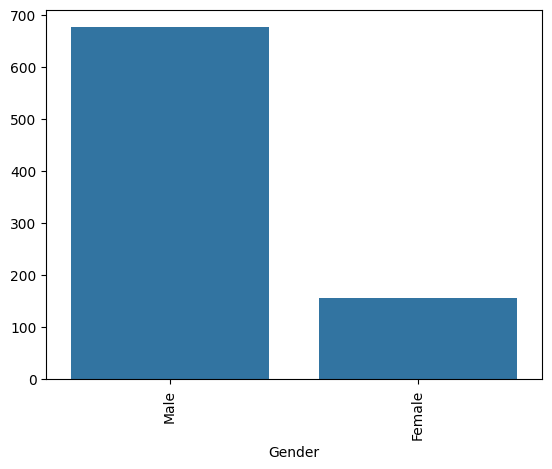

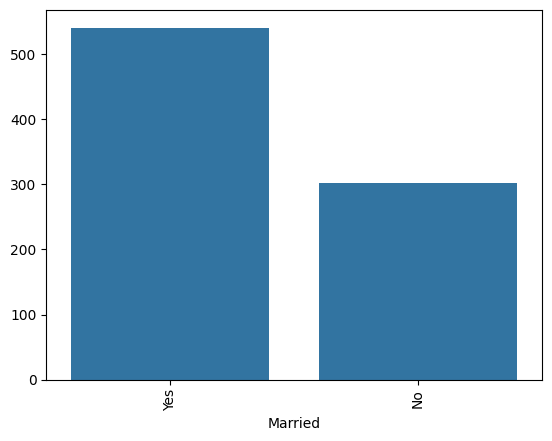

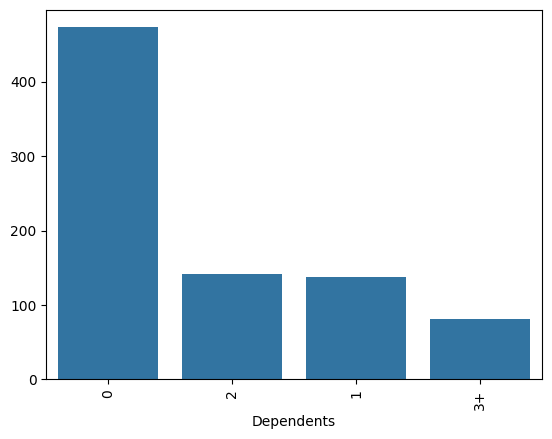

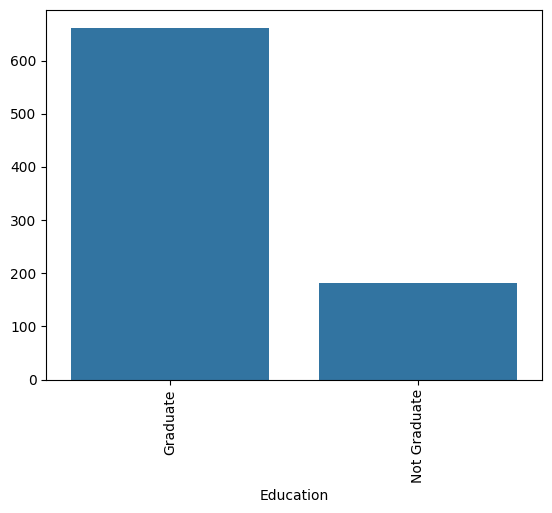

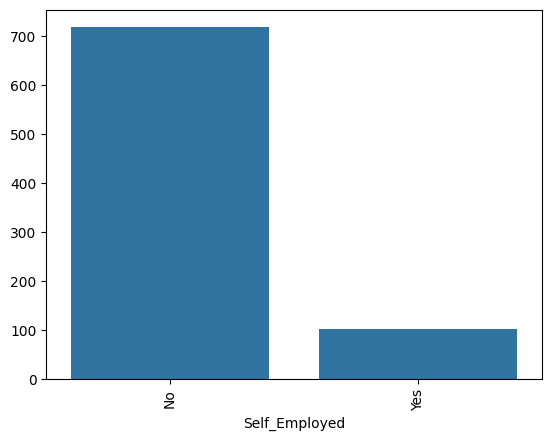

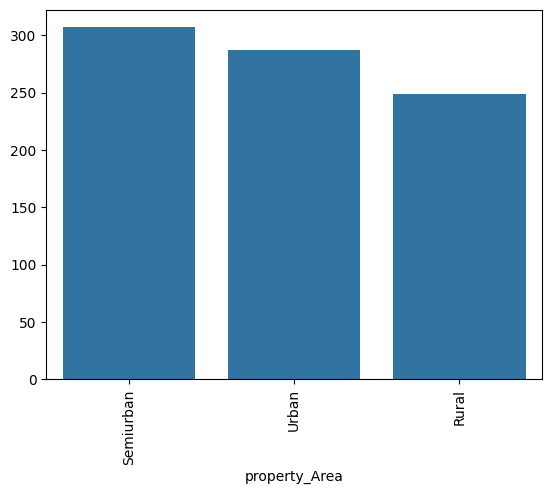

In [901]:
for column in cat_columns:
    plt_df = whole_dataset[column].value_counts()
    sns.barplot(x=plt_df.index, y=plt_df.values)
    plt.xticks(rotation=90)
    plt.show()

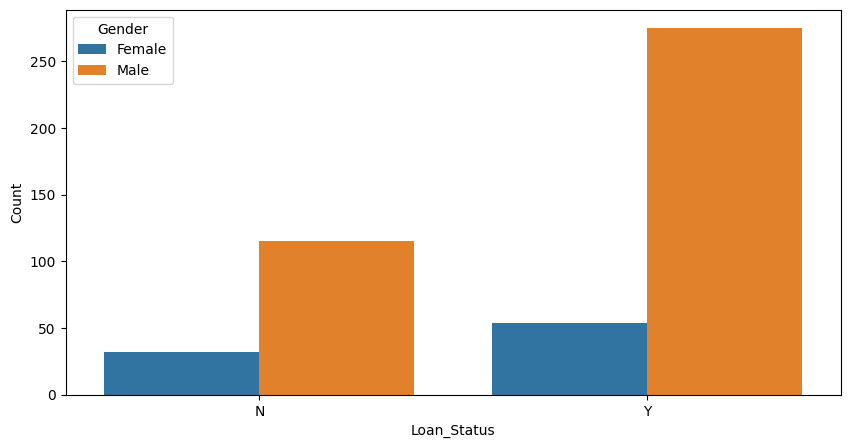

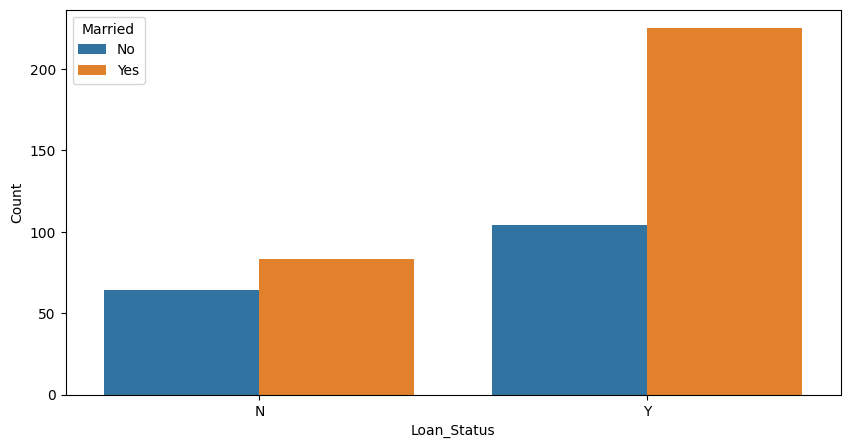

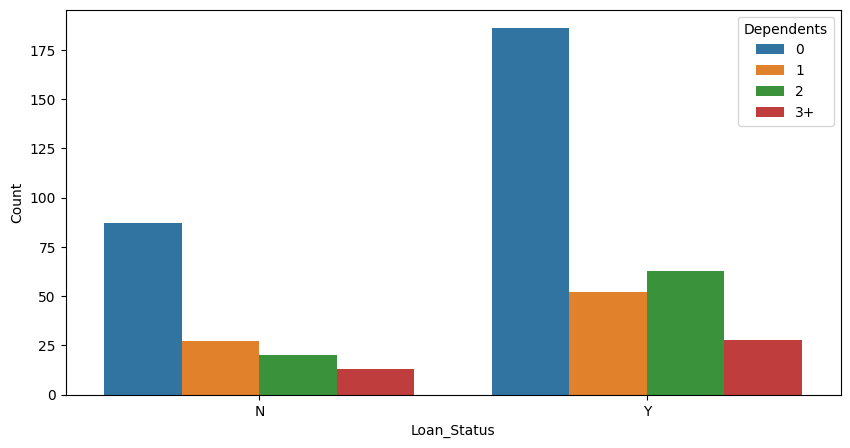

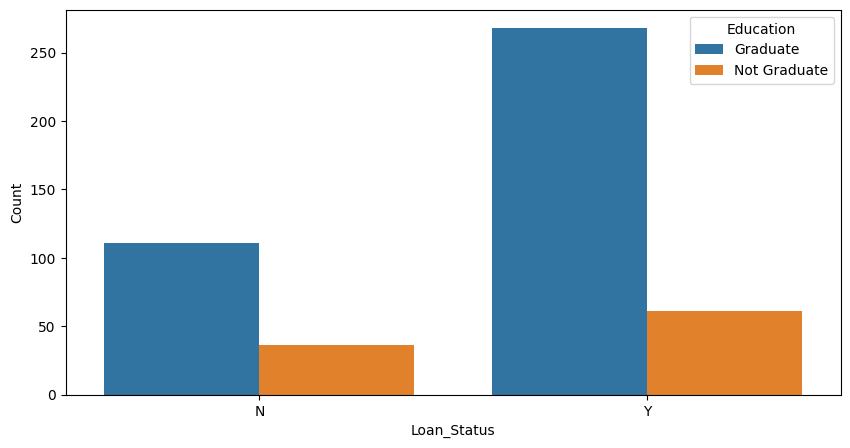

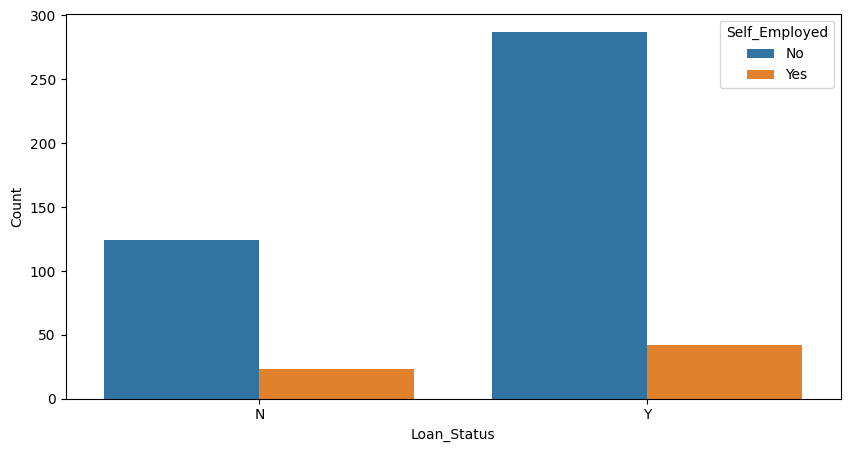

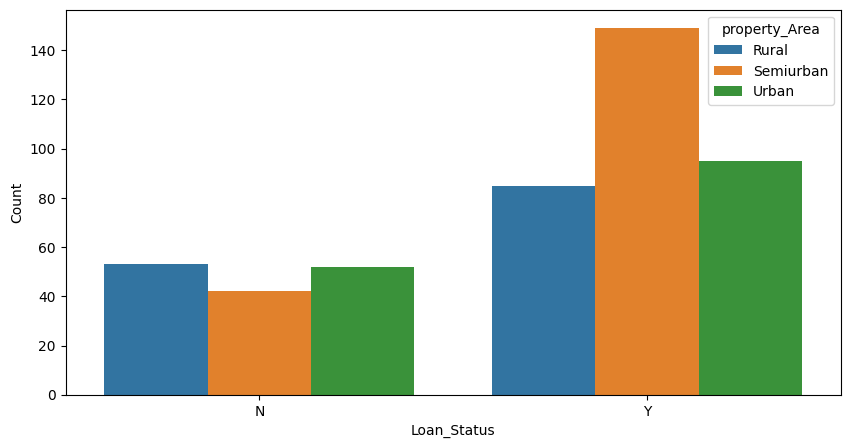

In [902]:
for column in cat_columns:
    plt2_df = train_dataset.sort_values(column).groupby([column, 'Loan_Status']).size().reset_index(name='Count')
    plt.figure(figsize=(10,5))
    sns.barplot(plt2_df, x='Loan_Status', y='Count', hue=column)
    plt.show()

In [903]:
train_dataset['Gender'] = train_dataset['Gender'].replace({'Male':1, 'Female':2})
train_dataset['Married'] = train_dataset['Married'].replace({'Yes':1, 'No':2})
train_dataset['Dependents'] = train_dataset['Dependents'].replace({'0':0, '1':1, '2':2, '3+':3})
train_dataset['Education'] = train_dataset['Education'].replace({'Graduate':1, 'Not Graduate':2})
train_dataset['Self_Employed'] = train_dataset['Self_Employed'].replace({'Yes':1, 'No':2})
train_dataset['property_Area'] = train_dataset['property_Area'].replace({'Urban':1, 'Semiurban':2, 'Rural':3})
train_dataset['Total_Income'] = train_dataset['ApplicantIncome'] + train_dataset['CoapplicantIncome']

In [904]:
test_dataset['Gender'] = test_dataset['Gender'].replace({'Male':1, 'Female':2})
test_dataset['Married'] = test_dataset['Married'].replace({'Yes':1, 'No':2})
test_dataset['Dependents'] = test_dataset['Dependents'].replace({'0':0, '1':1, '2':2, '3+':3})
test_dataset['Education'] = test_dataset['Education'].replace({'Graduate':1, 'Not Graduate':2})
test_dataset['Self_Employed'] = test_dataset['Self_Employed'].replace({'Yes':1, 'No':2})
test_dataset['property_Area'] = test_dataset['property_Area'].replace({'Urban':1, 'Semiurban':2, 'Rural':3})
test_dataset['Total_Income'] = test_dataset['ApplicantIncome'] + test_dataset['CoapplicantIncome']

In [905]:
features_train = train_dataset.drop(columns=['Loan_ID', 'Loan_Status'])
target_train = train_dataset['Loan_Status']

In [906]:
model = RandomForestClassifier(n_estimators=450, n_jobs=-1, random_state=42)

In [907]:
model.fit(features_train, target_train)

RandomForestClassifier(n_estimators=450, n_jobs=-1, random_state=42)

In [908]:
cross_val_score(model, features_train, target_train, cv=10).mean()

0.7921099290780141

In [909]:
features_test = test_dataset.drop(columns=['Loan_ID'])

In [910]:
prediction = model.predict(features_test)

In [911]:
test_dataset['Loan_Status'] = prediction

test_dataset[['Loan_ID', 'Loan_Status']].to_csv('problem_one_submission.csv', index=False)

In [912]:
import joblib

In [913]:
joblib.dump(model, 'model1.pkl')

['model1.pkl']

In [914]:
joblib.dump(test_dataset, 'test.pkl')

['test.pkl']

In [915]:
loaded_model1 = joblib.load('model1.pkl')

In [916]:
loaded_test = joblib.load('test.pkl')

In [917]:
testcsv = loaded_test.to_csv('test.csv', index=False)

testcsv